# Pymaceuticals Inc.
---

## Analysis

### Analysis of Pymaceuticals, Inc. Anti-Cancer Medication Study

This week's challenge involved analyzing data from Pymaceuticals, Inc., a pharmaceutical company specializing in anti-cancer medications. The focus was on their drug of interest, Capomulin, as part of a study screening potential treatments for squamous cell carcinoma (SCC), a common form of skin cancer. The study involved 249 mice with SCC tumors who received various drug regimens, and tumor development was observed and measured over 45 days.

### Summary Statistics:
After preparing the data, a summary statistics table was generated, showcasing mean, median, variance, standard deviation, and standard error of tumor volumes for each drug regimen. Notably, Ramicane and Capomulin exhibited the lowest average tumor volumes, with lower variance, standard deviation, and standard errors compared to other regimens.

### Bar and Pie Charts:
Bar and pie charts were created to visualize the dataset. The bar chart displayed the total number of rows for each drug regimen, highlighting a balanced distribution. The pie chart illustrated a balanced distribution of male and female mice in the study.

### Quartiles, Outliers, and Boxplot:
Examining quartiles, outliers, and boxplots revealed that, between the four considered treatments, Infubinol was the only one with outliers. Ramicane exhibited the lowest final tumor volume, closely followed by Capomulin, while Infubinol had the highest final tumor volumes.

### Line Plot:
A line plot detailing tumor volume vs. time point for a mouse treated with Capomulin showed a decrease in tumor volume over time, despite an initial increase.

### Scatter Plot and Regression Analysis:
A scatter plot depicting the average tumor volume vs. mouse weight for the Capomulin regimen revealed a direct proportionality. A strong, positive correlation coefficient of 0.84 was obtained, and a linear regression model confirmed the relationship.

### Conclusion:
The analysis suggests that Ramicane outperformed Capomulin, displaying the lowest final tumor volume. Additionally, the average tumor volume appears to be directly proportional to mouse weight.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_df = pd.merge(study_results, mouse_metadata, how="left", on=("Mouse ID"))

# Display the data table for preview
complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(complete_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_df = complete_df[complete_df[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = complete_df.loc[(complete_df["Mouse ID"] == "g989")]
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_df.loc[(complete_df["Mouse ID"] != "g989")]

# Reset indexes
clean_df = clean_df.reset_index(drop=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_df = clean_df.groupby(["Drug Regimen"])

mean = grouped_df["Tumor Volume (mm3)"].mean()
median = grouped_df["Tumor Volume (mm3)"].median()
var = grouped_df["Tumor Volume (mm3)"].var()
stdev = grouped_df["Tumor Volume (mm3)"].std()
sem = grouped_df["Tumor Volume (mm3)"].sem()

summary_statistics = pd.DataFrame({"Mean Tumor Volume": mean,
                                   "Median Tumor Volume": median,
                                   "Tumor Volume Variance": var,
                                   "Tumor Volume Std. Dev.":stdev,
                                   "Tumor Volume Std. Err.": sem})

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grouped_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

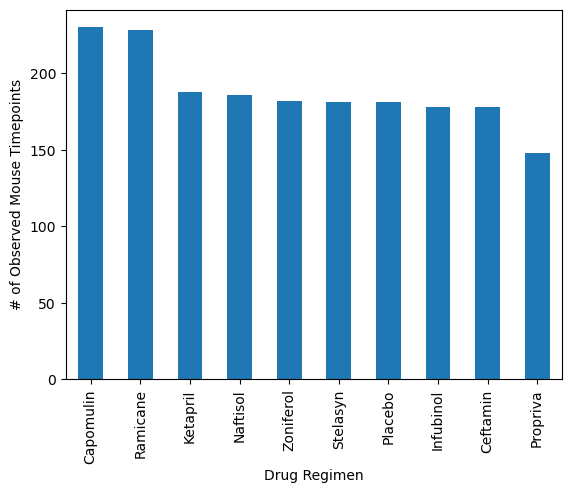

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_df["Drug Regimen"].value_counts()

figure1 = drug_regimen.plot(kind="bar",
                            xlabel="Drug Regimen",
                            ylabel="# of Observed Mouse Timepoints")
xticklabels = drug_regimen.index
figure1.set_xticklabels(xticklabels)
plt.show()
plt.tight_layout()

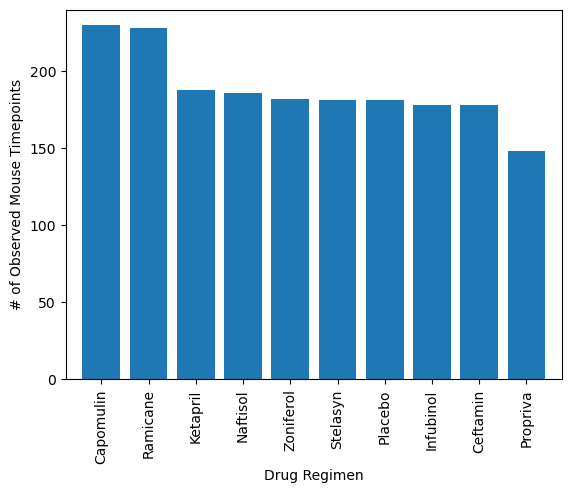

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import numpy as np
x_axis = np.arange(len(drug_regimen))
plt.bar(x_axis, drug_regimen)
plt.xticks(x_axis, drug_regimen.index)
plt.xticks(rotation = 90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_regimen)+10)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

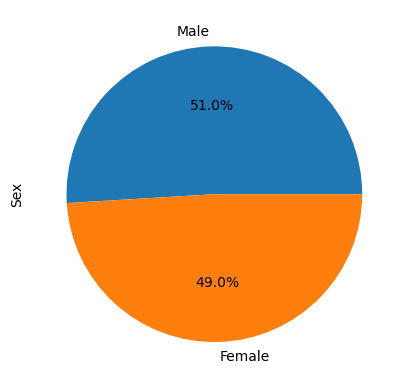

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_df["Sex"].value_counts().rename_axis("Sex").reset_index(name="Count")
mice_sex_pie = mice_sex.plot(kind="pie", 
                             y="Count", 
                             labels=mice_sex["Sex"], 
                             autopct="%1.1f%%", 
                             legend=None)
mice_sex_pie.set_ylabel("Sex")
plt.show()

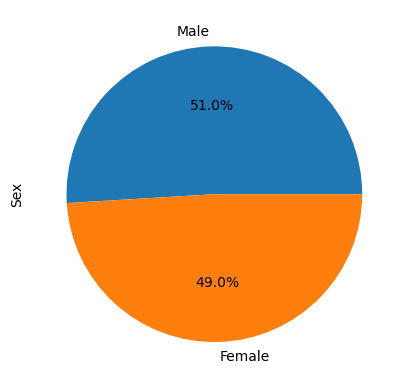

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes=mice_sex["Count"]
labels=mice_sex["Sex"]
plt.pie(x=sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Find max timepoint for each mouse
last_df = pd.DataFrame(clean_df.groupby("Mouse ID").max()["Timepoint"]).reset_index()

# Merge max timepoint onto data_df
merge_df = pd.merge(last_df, clean_df, on=("Mouse ID", "Timepoint"),how="left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in Treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Treatments_df = merge_df.loc[merge_df["Drug Regimen"] == treatment]
    last_tumor_list = Treatments_df.loc[Treatments_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    Tumor_volume_list.append(Treatments_df.loc[Treatments_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"])

    # Determine outliers using upper and lower bounds
    quartiles = last_tumor_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"IQR for {treatment}: {iqr}")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = last_tumor_list.loc[(Treatments_df["Tumor Volume (mm3)"] >= upper_bound) | (Treatments_df["Tumor Volume (mm3)"] <= lower_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

IQR for Capomulin: 7.781863460000004
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Ramicane: 9.098536719999998
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Infubinol: 11.477135160000003
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
IQR for Ceftamin: 15.577752179999997
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


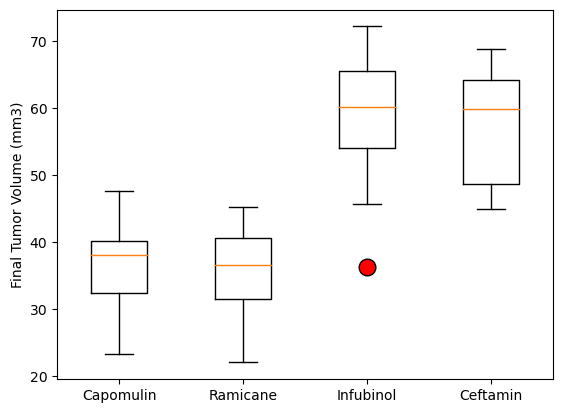

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(Tumor_volume_list, flierprops = dict(marker = "o", markerfacecolor = "red", markersize = 12))
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks(list(np.arange(len(Treatments_list))+1), Treatments_list)
plt.show()

## Line and Scatter Plots

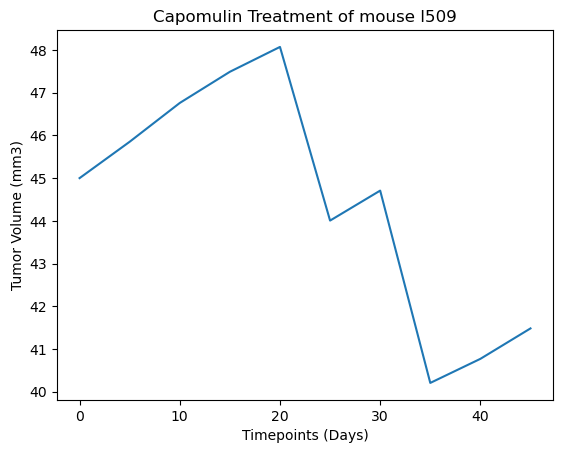

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
l509_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509"]
time = l509_df["Timepoint"]
tumor_volume = l509_df["Tumor Volume (mm3)"]
plt.plot(time, tumor_volume)
plt.title("Capomulin Treatment of mouse l509")
plt.xlabel("Timepoints (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

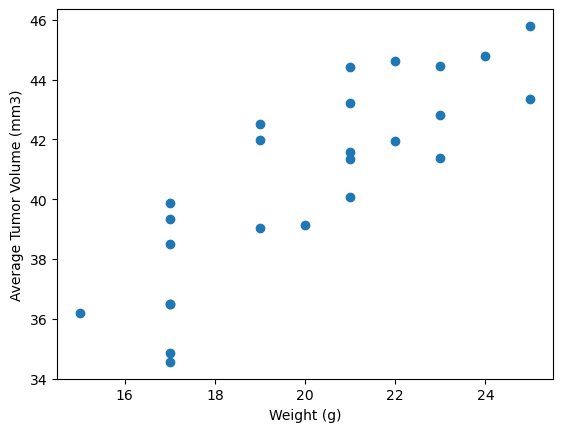

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_obs_vol = Capomulin_df.groupby("Mouse ID").mean(numeric_only=True)
x = avg_obs_vol["Weight (g)"]
y = avg_obs_vol["Tumor Volume (mm3)"]
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


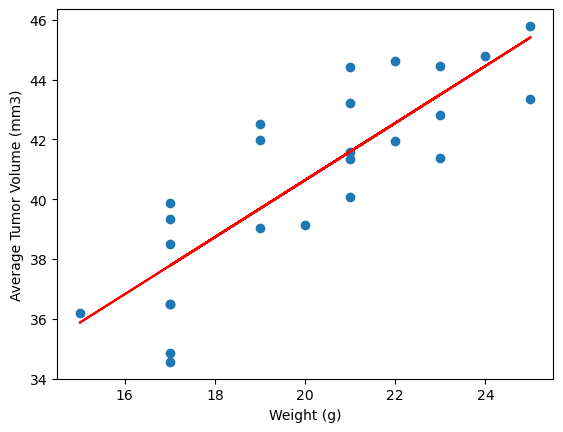

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = x_values = avg_obs_vol.iloc[:,4]
tumor = y_values = avg_obs_vol.iloc[:,1]

correlation = st.pearsonr(weight,tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")

m, b, rvalue, pvalue, stderrr = st.linregress(x_values, y_values)


regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()